# Activity 2.03

In [1]:
import tensorflow as tf
import os

In [2]:
def load_audio(file_path, sample_rate=44100):
    # Load audio at 44.1kHz sample-rate
    audio = tf.io.read_file(file_path)
    audio, sample_rate = tf.audio.decode_wav(audio,
                                             desired_channels=-1,
                                             desired_samples=sample_rate)
    return tf.transpose(audio)

In [3]:
prefix = "../Datasets/data_speech_commands_v0.02/zero/"
paths = [os.path.join(prefix, path) for path in os.listdir(prefix)]

In [4]:
def prep_ds(ds, shuffle_buffer_size=1024, batch_size=16):
    # Randomly shuffle (file_path, label) dataset
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    # Load and decode audio from file paths
    ds = ds.map(load_audio)
    # Take the absolute value
    ds = ds.map(tf.abs)
    # Apply log1p function
    ds = ds.map(tf.math.log1p)
    # Repeat dataset forever
    ds = ds.repeat()
    # Prepare batches
    ds = ds.batch(batch_size)
    # Prefetch
    ds = ds.prefetch(buffer_size=batch_size)

    return ds

In [5]:
ds = tf.data.Dataset.from_tensor_slices(paths)
train_ds = prep_ds(ds)

2021-10-05 15:03:52.290496: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Take 1 batch and print it out

In [6]:
for x in train_ds.take(1):
    print(x)

tf.Tensor(
[[[1.2615402e-02 3.0949200e-02 2.9439095e-02 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[0.0000000e+00 3.0517112e-05 9.1548543e-05 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[9.1548543e-05 1.5257625e-04 6.1033294e-05 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 ...

 [[1.4942444e-03 2.3775424e-03 2.0425902e-03 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[3.0517112e-05 3.0517112e-05 3.0517112e-05 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[1.2206286e-04 0.0000000e+00 6.1033294e-05 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]], shape=(16, 1, 44100), dtype=float32)


2021-10-05 15:03:54.046018: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


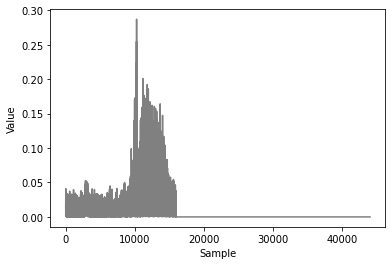

In [7]:
import matplotlib.pyplot as plt
plt.plot(x[0,:,:].numpy().T, color='grey')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.savefig('2-22.png', dpi=300)